In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import json

In [3]:
df = pd.read_csv('../data/interim/df_final.csv')

In [4]:
# JSON file source
ruta_json = "../data/json_files/full_var_dict.json"

# loading JSON file
with open(ruta_json, 'r') as archivo:
    varijson = json.load(archivo)

In [5]:
def parse_json(columna):
    categories = list(varijson[columna]['diccionario'].values())
    categories = [str(cat) for cat in categories]

    values=list(varijson[columna]['diccionario'].keys())
    values = [int(cat) for cat in values]
    
    title = varijson[columna]['Descripción']

    return values, categories, title

In [6]:
def percentage_dep_anx (valor):
    counts = df.groupby([valor, 'dep_anx']).size()
    counts_df = counts.unstack()
    percentage_df = counts_df.div(counts_df.sum(axis=1), axis=0) * 100
    print(percentage_df)

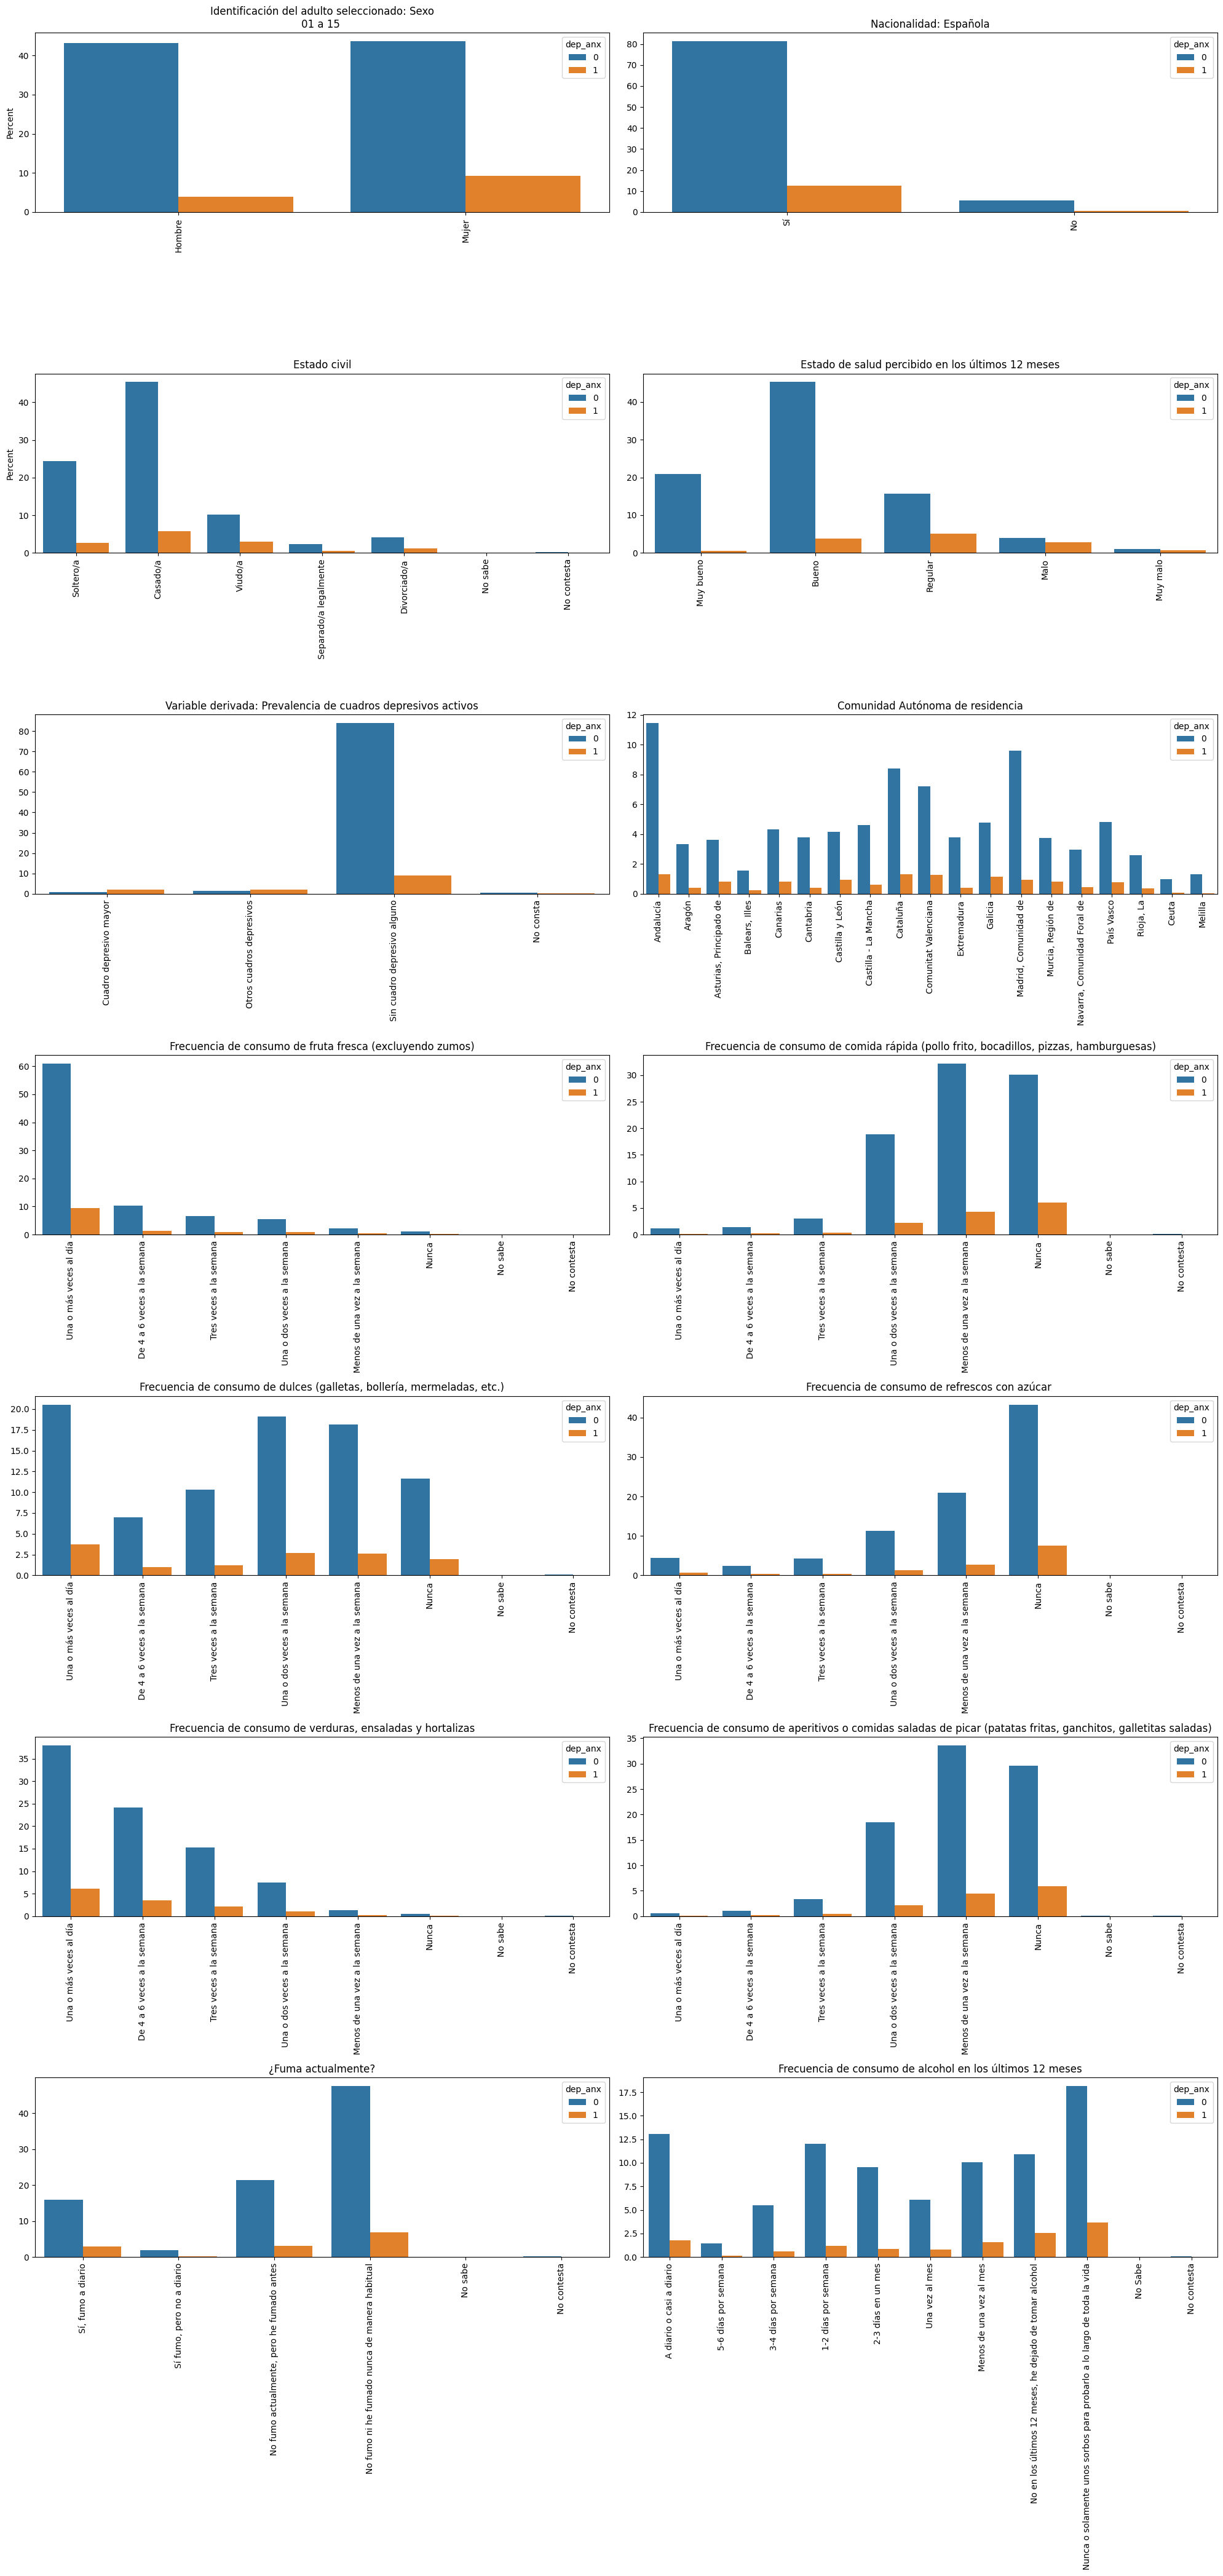

dep_anx          0          1
SEXOa                        
1.0      91.742060   8.257940
2.0      82.443075  17.556925
dep_anx          0          1
E2_1a                        
1.0      86.501590  13.498410
2.0      91.856925   8.143075
dep_anx           0          1
E4b                           
1.0       90.112096   9.887904
2.0       88.682417  11.317583
3.0       77.658840  22.341160
4.0       80.461538  19.538462
5.0       78.021978  21.978022
8.0      100.000000        NaN
9.0       92.063492   7.936508
dep_anx          0          1
G21                          
1.0      97.128378   2.871622
2.0      92.111326   7.888674
3.0      75.375572  24.624428
4.0      58.941728  41.058272
5.0      56.641604  43.358396
dep_anx                     0          1
CUADROS_DEPRESIVOS                      
1.0                 28.064516  71.935484
2.0                 44.113667  55.886333
3.0                 90.301231   9.698769
9.0                 65.243902  34.756098
dep_anx          0       

In [28]:
vars=['SEXOa','E2_1a', 'E4b', 'G21', 'CUADROS_DEPRESIVOS', 'CCAA', 'U120_1','U120_13', 'U120_11', 'U120_12', 'U120_7', 'U120_14', 'V121', 'W127']
cols=2
rows=((len(df[vars].columns) - 1) // cols) + 1
fig, axis = plt.subplots(rows, cols, figsize=(20, rows * 6))

for col, ax in zip(df[vars].columns , axis.flatten()):
  values, categories, title= parse_json(col)
  sns.countplot(data=df, x=col, hue = 'dep_anx', ax=ax, stat='percent')
  ax.set_title(title)
  ax.set_ylabel('')
  ax.set_xlabel('')
  ax.set_xticks(range(len(values)))
  ax.set_xticklabels(categories,  rotation=90) 

axis[0,0].set_ylabel('Percent')
axis[1,0].set_ylabel('Percent')


#removing empty subplots
for i in range(len(df[vars]), len(axis.flatten())):
      fig.delaxes(axis.flatten()[i])

plt.tight_layout()
plt.show()

for i in vars:
    percentage_dep_anx(i)

In [8]:
df_copy = df.query('EDADa< 104')

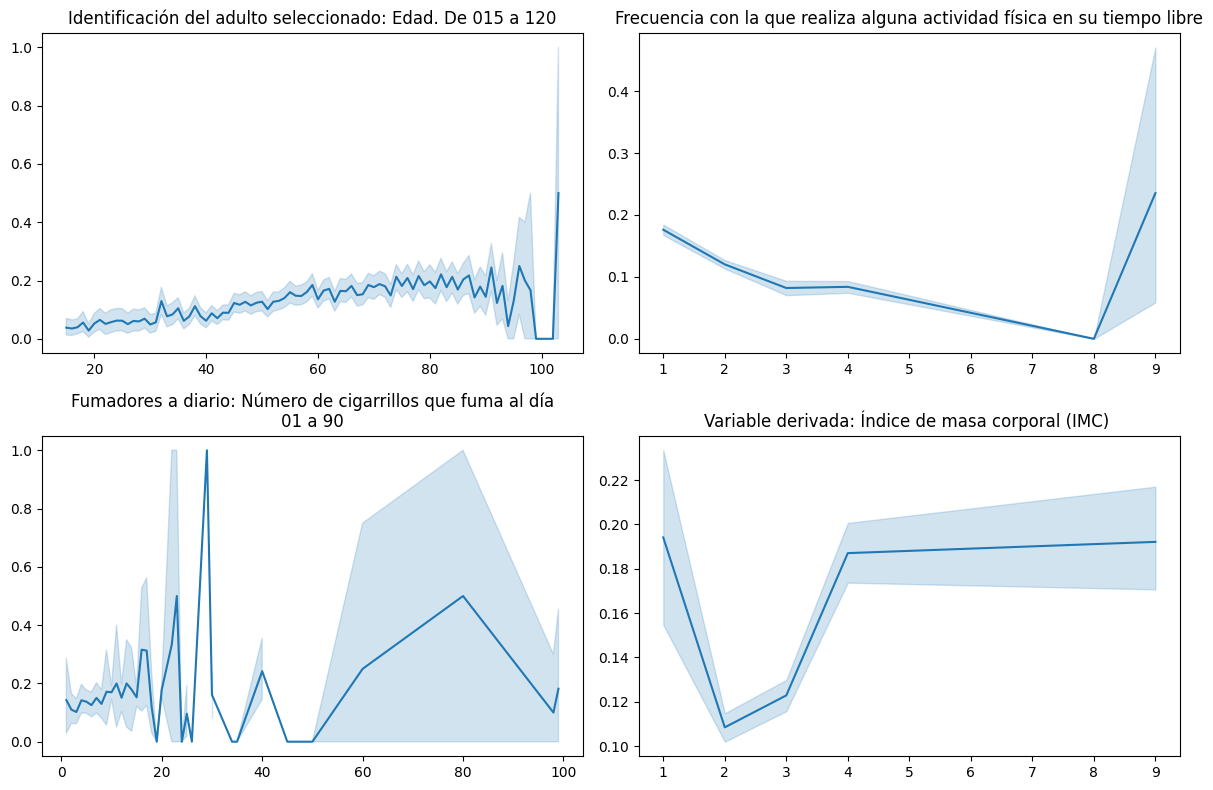

dep_anx           0          1
EDADa                         
15.0      96.178344   3.821656
16.0      96.470588   3.529412
17.0      96.022727   3.977273
18.0      94.409938   5.590062
19.0      97.175141   2.824859
...             ...        ...
100.0    100.000000        NaN
101.0    100.000000        NaN
102.0    100.000000        NaN
103.0     50.000000  50.000000
104.0    100.000000        NaN

[90 rows x 2 columns]
dep_anx           0          1
T112                          
1.0       82.388936  17.611064
2.0       87.979570  12.020430
3.0       91.796701   8.203299
4.0       91.607087   8.392913
8.0      100.000000        NaN
9.0       76.470588  23.529412
dep_anx           0           1
V123                           
1.0       85.714286   14.285714
2.0       88.976378   11.023622
3.0       89.795918   10.204082
4.0       85.792350   14.207650
5.0       86.274510   13.725490
6.0       87.443946   12.556054
7.0       84.971098   15.028902
8.0       87.027027   12.972973
9.0   

In [29]:
vars=['EDADa', 'T112', 'V123', 'IMC']
cols=2
rows=((len(df[vars].columns) - 1) // cols) + 1
fig, axis = plt.subplots(rows, cols, figsize=(12, rows * 4))

for col, ax in zip(df[vars].columns , axis.flatten()):
  values, categories, title= parse_json(col)
  sns.lineplot(data=df_copy, x=col, y = 'dep_anx', ax=ax)
  ax.set_title(title)
  ax.set_ylabel('')
  ax.set_xlabel('')

#axis[0,0].set_ylabel('Percent')
#axis[1,0].set_ylabel('Percent')


#removing empty subplots
for i in range(len(df[vars]), len(axis.flatten())):
      fig.delaxes(axis.flatten()[i])

plt.tight_layout()
plt.show()

for i in vars:
    percentage_dep_anx(i)